In [1]:
import numpy as np

In [2]:
from stockmarket.limitorderbook import *
from stockmarket.agent import Trader
from stockmarket.firms import Firm
from stockmarket.stock import Stock

In [3]:
from numpy.testing import assert_equal
from numpy.testing import assert_raises
import operator
from stockmarket import functions, setup, marketmechanisms, randomset, database
import random

In [4]:
from stockmarket.functions import div0
from stockmarket.valuationfunctions import *

## To test
1. setup orderbook
2. run model

# test new marketmechanism functions 

In [22]:
fundamentalist = Trader(name='supplier', money=10, bid_ask_spread=10, memory=2, ma_short=3, ma_long=5,
                  valuation_function=extrapolate_average_profit, propensity_to_switch=1.1)
chartist = Trader(name='demander', money=10, bid_ask_spread=10, memory=2, ma_short=3, ma_long=4,
                  valuation_function=extrapolate_ma_price, propensity_to_switch=1.1)

In [6]:
stock = Stock(Firm(name='firm', book_value=200, profits=[3, 5, 5, 3]), 200)

In [7]:
limitorderbook = LimitOrderBook(stock, 100, 120)

In [23]:
new_orderbook = marketmechanisms.orders_based_on_stock_valuation(chartist, limitorderbook, stock)

In [24]:
len(new_orderbook.bids)

1

In [13]:
len(limitorderbook.bids)

0

In [25]:
len(new_orderbook.asks)

0

In [19]:
new_orderbook = marketmechanisms.orders_based_on_stock_valuation(fundamentalist, limitorderbook, stock)
assert_equal(len(new_orderbook.bids), 1)
assert_equal(len(new_orderbook.asks), 0)

## setup orderbook

In [7]:
assert_equal(div0(10, 4), 2.5)

In [62]:
seed=1
simulation_time=100
amount_fundamentalists=40
amount_chartists=40
amount_firms=3
initial_money=(100, 200)
initial_bid_ask=(0,0)
initial_memory=(3,7)
initial_ma_short=(1,3)
initial_ma_long=(6,7)
initial_profit=(200,200)
initial_book_value=(10000, 10000)
initial_stock_amount=400
observable_set_size=3

In [63]:
agents = setup.setup_agents(init_money=initial_money,
                                init_bid_ask_spread=initial_bid_ask,
                                init_memory_size=initial_memory,
                                init_ma_s=initial_ma_short,
                                init_ma_l=initial_ma_long,
                                fundamentalist=amount_fundamentalists,
                                chartist=amount_chartists)

firms = setup.setup_firms(init_book_value=initial_book_value,
                              init_profit=initial_profit,
                              amount_of_firms=amount_firms)

stocks = setup.setup_stocks(firms, amount=initial_stock_amount)

order_books = []
for stock in stocks:
    order_books.append(LimitOrderBook(stock, 100, 120))

setup.distribute_initial_stocks(stocks, agents)

In [159]:
intensity_of_choice = 1
realised_returns = 0.05
possibly_realised_returns = 0.04

prob_status_quo_choice = np.divide(np.exp(intensity_of_choice * realised_returns),
                                       np.exp(intensity_of_choice * realised_returns)
                                       + np.exp(intensity_of_choice * possibly_realised_returns))
prob_status_quo_choice

0.50249997916687505

In [160]:
%matplotlib inline
import matplotlib.pyplot as plt

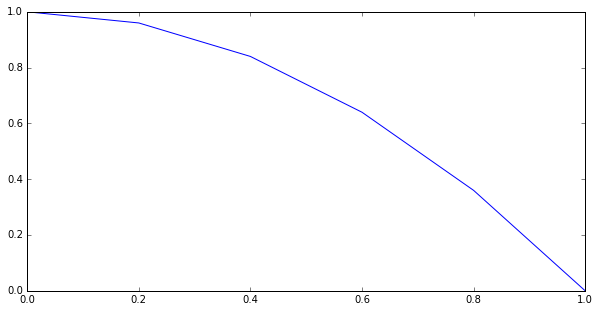

In [170]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

ax.plot([0, 0.2, 0.4, 0.6, 0.8, 1], [1 - x**2 for x in [0, 0.2, 0.4, 0.6, 0.8, 1]])

In [ ]:
[x for x in range 1 - missed_returns ** conservativeness]

In [149]:
def chartist_or_fundamentalist(agent, intensity_of_switching, memory_weight, realised_profitability, av_chartist_profitability, av_fundamentalist_profitability):
    """Returns the preferred strategy for an agent based on profitability"""

    fundamentalist = 'function extrapolate_average_profit'
    chartist = 'function predict_by_moving_avg_growth'
    agent_type = str(agent.function)

    if (fundamentalist not in agent_type) and (chartist not in agent_type):
        raise ValueError("agent is neither a chartist nor a fundamentalist")

    if fundamentalist in agent_type:
        estimated_fundamentalist_profitability = memory_weight * realised_profitability + (1 - memory_weight) * av_fundamentalist_profitability
        estimated_chartist_profitability = av_chartist_profitability
    else:
        estimated_fundamentalist_profitability = av_fundamentalist_profitability
        estimated_chartist_profitability = memory_weight * realised_profitability + (1 - memory_weight) * av_chartist_profitability

    # higher intensity of switching means higher probability to pick the most profitable strategy
    prob_chartist = np.divide(np.exp(intensity_of_switching * estimated_chartist_profitability),
                              np.exp(intensity_of_switching * estimated_chartist_profitability)
                              + np.exp(intensity_of_switching * estimated_fundamentalist_profitability))
    prob_fundamentalist = 1 - prob_chartist

    strategy = np.random.choice([chartist, fundamentalist], p=[prob_chartist, prob_fundamentalist])

    return strategy

In [140]:
testAgents = [Trader("Agent1", 1000, 0, 2, 3, 5, extrapolate_average_profit),
            Trader("Agent2", 1000, 0, 2, 3, 5, predict_by_moving_avg_growth),
             Trader("WeirdAgent", 1000, 0, 2, 3, 5, None)]

In [143]:
fundamentalist = '<function extrapolate_average_profit at 0x0000000005B132F0>'
str(testAgents[0].function) == fundamentalist

True

In [150]:
chartist_or_fundamentalist(testAgents[0], 0.3, 0.4, 500, 100, 300)

'<function extrapolate_average_profit at 0x0000000005B132F0>'

In [151]:
testAgents = [Trader("Agent1", 1000, 0, 2, 3, 5, extrapolate_average_profit),
            Trader("Agent2", 1000, 0, 2, 3, 5, predict_by_moving_avg_growth),
             Trader("WeirdAgent", 1000, 0, 2, 3, 5, None)]

chartist_or_fundamentalist(testAgents[0], 0.3, 0.4, 500, 100, 300)

'<function extrapolate_average_profit at 0x0000000005B132F0>'

### 1 create new limitorderBook

In [3]:
# create a firm
firm = Firm("Firm1", 10000, [200, 300, 400, 300], 1)
# create a stock of that firm
stocks = Stock(firm, 1000)

In [4]:
# create new limitOrderBook
order_book = LimitOrderBook(stocks, 100, 120)

In [5]:
order_book

order_book_Stock of Firm1

### 2 add bids to the limit orderbook
* The highest bid should be at the end of the list.
* For bids of equal value, the oldest bid should be at the top

In [6]:
order_book.add_bid(10, 20, 'trader-1')
order_book.bids

[Order_p=10_t=b_o=trader-1_a=0]

In [7]:
order_book.add_bid(5, 20, 'trader-2')
order_book.bids

[Order_p=5_t=b_o=trader-2_a=0, Order_p=10_t=b_o=trader-1_a=0]

In [8]:
order_book.add_bid(7, 20, 'trader-3')
order_book.bids

[Order_p=5_t=b_o=trader-2_a=0,
 Order_p=7_t=b_o=trader-3_a=0,
 Order_p=10_t=b_o=trader-1_a=0]

In [9]:
order_book.add_bid(7, 20, 'trader-4')
order_book.bids

[Order_p=5_t=b_o=trader-2_a=0,
 Order_p=7_t=b_o=trader-4_a=0,
 Order_p=7_t=b_o=trader-3_a=0,
 Order_p=10_t=b_o=trader-1_a=0]

In [10]:
order_book.add_bid(7, 20, 'trader-5')
order_book.bids

[Order_p=5_t=b_o=trader-2_a=0,
 Order_p=7_t=b_o=trader-5_a=0,
 Order_p=7_t=b_o=trader-4_a=0,
 Order_p=7_t=b_o=trader-3_a=0,
 Order_p=10_t=b_o=trader-1_a=0]

In [11]:
order_book.bids[0].price

5

In [12]:
assert_equal(order_book.bids[0].price, 5)
assert_equal(order_book.bids[-1].price, 10)

In [13]:
assert_equal(order_book.bids[-2].owner, 'trader-3')

### 3 Add aks to the limit order book
* The lowest ask should be at the beginning of the list.
* For asks of equal value, the oldest ask should be at the bottom

In [14]:
order_book.add_ask(11, 20, 'trader-1')
order_book.asks

[Order_p=11_t=a_o=trader-1_a=0]

In [15]:
order_book.add_ask(5, 20, 'trader-2')
order_book.add_ask(7, 20, 'trader-3')
order_book.add_ask(7, 20, 'trader-4')
order_book.add_ask(7, 20, 'trader-5')
order_book.asks

[Order_p=5_t=a_o=trader-2_a=0,
 Order_p=7_t=a_o=trader-3_a=0,
 Order_p=7_t=a_o=trader-4_a=0,
 Order_p=7_t=a_o=trader-5_a=0,
 Order_p=11_t=a_o=trader-1_a=0]

In [16]:
# highest ask is 11
assert_equal(order_book.asks[-1].price, 11)
# lowest ask is 5
assert_equal(order_book.asks[0].price, 5)
# second highest ask trader = trader-5
assert_equal(order_book.asks[-2].owner, 'trader-5')

### 4 clean aging bids and asks

In [54]:
import numpy as np

In [60]:
np.isfinite(np.inf)

False

In [51]:
for n in range(120):
    order_book.clean_book()

In [52]:
order_book.add_bid(10, 20, 'trader-1')
order_book.add_bid(5, 20, 'trader-2')
order_book.add_ask(11, 20, 'trader-1')
order_book.add_ask(5, 20, 'trader-2')
matched_orders = 0
while True:
    matched_orders = order_book.match_orders()
    if matched_orders is None:
        print('i am getting out')
        break
    print(matched_orders)

(5, 20, Order_p=10_t=b_o=trader-1_a=0, Order_p=5_t=a_o=trader-2_a=0)
i am getting out


In [46]:
print(matched_orders)

None


In [18]:
order_book.add_bid(10, 20, 'trader-1')
order_book.add_bid(5, 20, 'trader-2')
order_book.add_ask(11, 20, 'trader-1')
order_book.add_ask(5, 20, 'trader-2')
for n in range(119):
    order_book.clean_book()
assert_equal(len(order_book.bids), 2)
assert_equal(len(order_book.asks), 2)
order_book.clean_book()
assert_equal(len(order_book.bids), 0)
assert_equal(len(order_book.asks), 0)

### 5 match the best bid with the best ask and remove them 

### Test if initial orders are properly dealt with

In [28]:
# add some asks
order_book.add_ask(5, 20, 'trader-2')
order_book.add_ask(7, 20, 'trader-3')
order_book.add_ask(7, 20, 'trader-4')
order_book.add_ask(7, 20, 'trader-5')
# and bids
order_book.add_bid(10, 20, 'trader-1')
order_book.add_bid(4, 20, 'trader-11')
order_book.add_bid(9, 20, 'trader-11')
matched_orders = order_book.match_orders()
# after an orderbook match both order books are reduced by 1
assert_equal(len(order_book.bids), 2)
assert_equal(len(order_book.asks), 3)
# and the highest bid was matched to the lowest ask, difference is 5
assert_equal(matched_orders[2].price - matched_orders[3].price, 5)
# the second match is bid p9 and ask p7, difference is 2
matched_orders = order_book.match_orders()
assert_equal(matched_orders[2].price - matched_orders[3].price, 2)
# Once again the order books are reduced by 1 in size
assert_equal(len(order_book.bids), 1)
assert_equal(len(order_book.asks), 2)
# then no more match is possible 
matched_orders = order_book.match_orders()
assert_equal(matched_orders, None)
for n in range(500):
    order_book.clean_book()
order_book.add_ask(5, 10, 'trader-2')
order_book.add_ask(7, 8, 'trader-3')
order_book.add_bid(10, 20, 'trader-1')
# first match should reduce asks book by 1
matched_orders = order_book.match_orders()
assert_equal(len(order_book.bids), 1)
assert_equal(len(order_book.asks), 1)
assert_equal(matched_orders[2].price - matched_orders[3].price, 5)
# the bid should have a remaining volume of 10
assert_equal(order_book.bids[0].volume, 10)
# second match 
matched_orders = order_book.match_orders()
# should reduce the lenght of the asks book to zero and bids should remain 1
assert_equal(len(order_book.bids), 1)
assert_equal(len(order_book.asks), 0)
# the bid should have a remaining volume of 2
assert_equal(order_book.bids[0].volume, 2)
# price should be 7 and volume 8
assert_equal(matched_orders[0], 7)
assert_equal(matched_orders[1], 8)
# no more matches should be possible, leaving the order in the orderbook
assert_equal(order_book.match_orders(), None)

In [27]:
# clean order book
for n in range(500):
    order_book.clean_book()

# 2 Implement in model 

In [ ]:
# reduce both bid and ask by volume